# Import the  Librays

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.pipeline as pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

# Lode the Data

In [2]:
import pandas as pd
import numpy as np

n = 10000

df = pd.DataFrame({

    'MovieID': np.arange(n),

    'Title': [f'Movie {i}' for i in range(n)],

    'Genre': np.random.choice(['Drama', 'Comedy', 'Action', 'Horror'], size=n),

    'ReleaseYear': np.random.randint(1980, 2024, size=n),

    'Rating': np.round(np.random.normal(loc=6.5, scale=1.5, size=n), 1),

    'Votes': np.random.randint(100, 100000, size=n),

    'RevenueMillions': np.round(np.random.uniform(1, 300, size=n), 2)

})

# Understand the Dataset.
Check basic details. 
\
 Check for missing values.

In [3]:
df.head()

,MovieID,Title,Genre,ReleaseYear,Rating,Votes,RevenueMillions
0,0,Movie 0,Horror,1982,5.4,30785,129.20
1,1,Movie 1,Action,1989,6.8,57149,85.33
2,2,Movie 2,Horror,1996,5.6,99672,62.46
3,3,Movie 3,Horror,2011,5.5,49745,106.02
4,4,Movie 4,Action,1991,7.4,74164,241.82


In [4]:
df.shape

(10000, 7)

In [5]:
df.isnull().sum()

MovieID            0
Title              0
Genre              0
ReleaseYear        0
Rating             0
Votes              0
RevenueMillions    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MovieID          10000 non-null  int32  
 1   Title            10000 non-null  object 
 2   Genre            10000 non-null  object 
 3   ReleaseYear      10000 non-null  int32  
 4   Rating           10000 non-null  float64
 5   Votes            10000 non-null  int32  
 6   RevenueMillions  10000 non-null  float64
dtypes: float64(2), int32(3), object(2)
memory usage: 429.8+ KB


In [7]:
df.describe()

,MovieID,ReleaseYear,Rating,Votes,RevenueMillions
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,2001.209900,6.512980,50091.459400,148.915420
std,2886.89568,12.617613,1.488906,28851.813478,86.150877
min,0.00000,1980.000000,0.800000,118.000000,1.040000
25%,2499.75000,1990.000000,5.500000,25104.750000,73.570000
50%,4999.50000,2001.000000,6.500000,49726.000000,148.535000
75%,7499.25000,2012.000000,7.500000,75247.250000,223.600000
max,9999.00000,2023.000000,11.900000,99987.000000,299.940000


# EDA

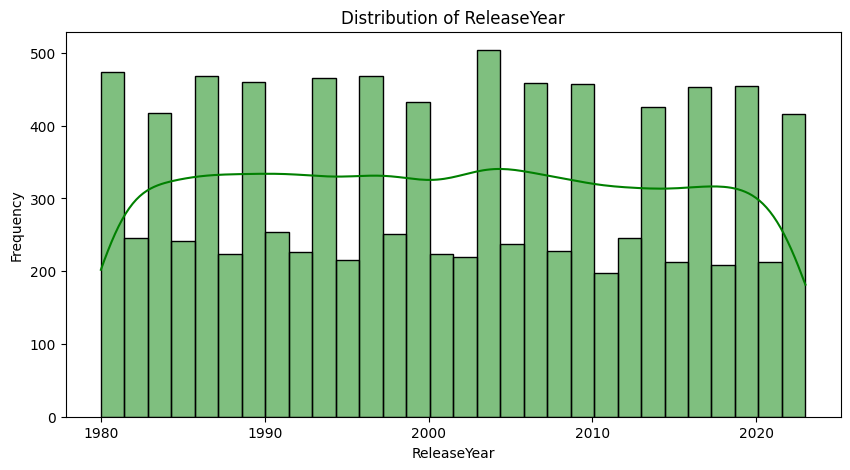

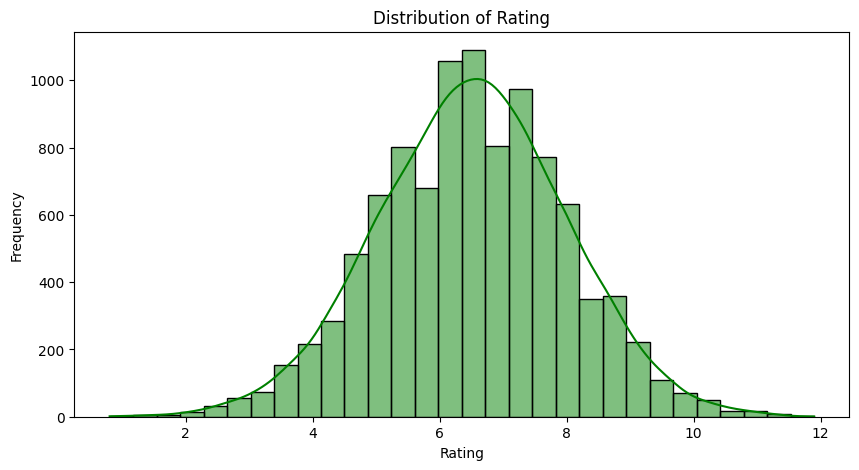

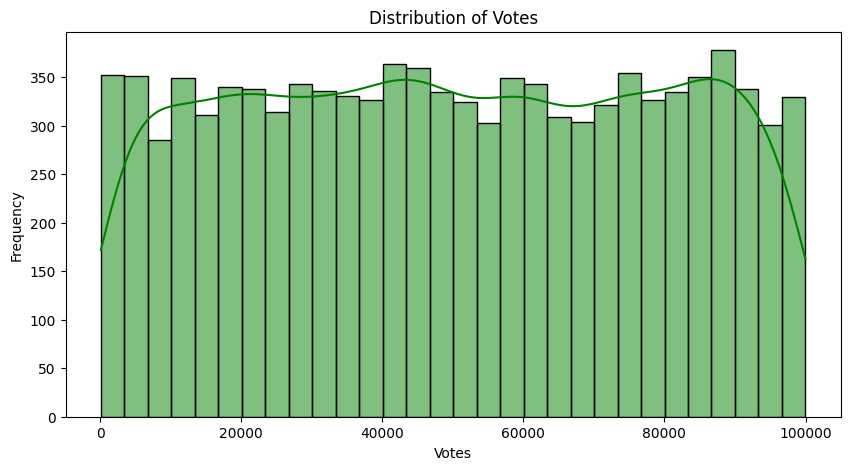

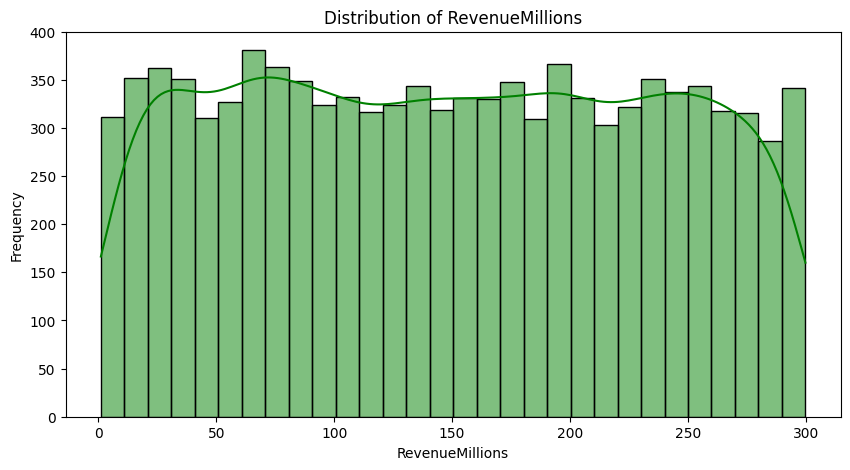

In [8]:
numericel_columns = df[["ReleaseYear", "Rating", "Votes", "RevenueMillions"]]
# Plotting the distribution of numeric columns
for column in numericel_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(numericel_columns[column], kde=True,bins=30, color='green')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

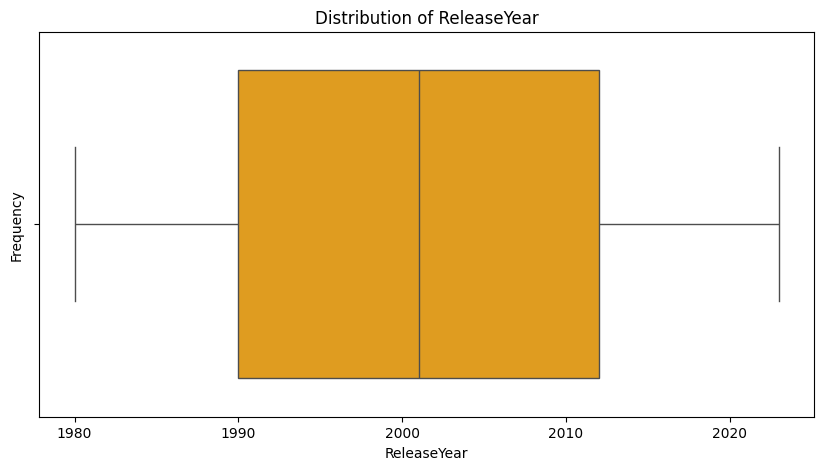

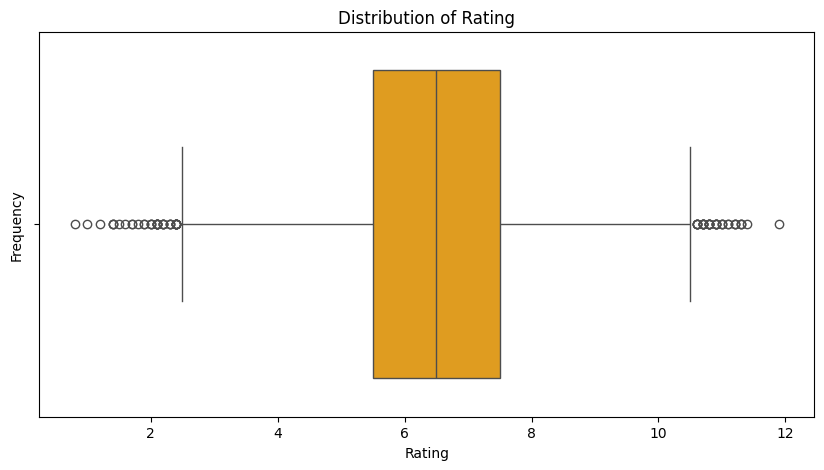

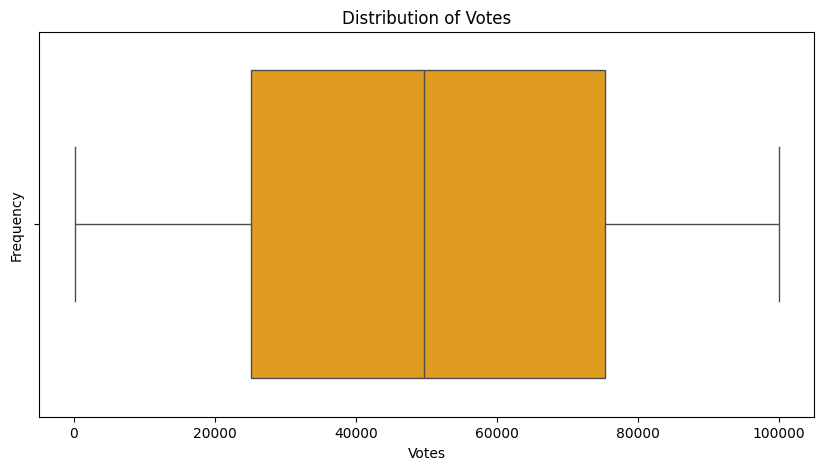

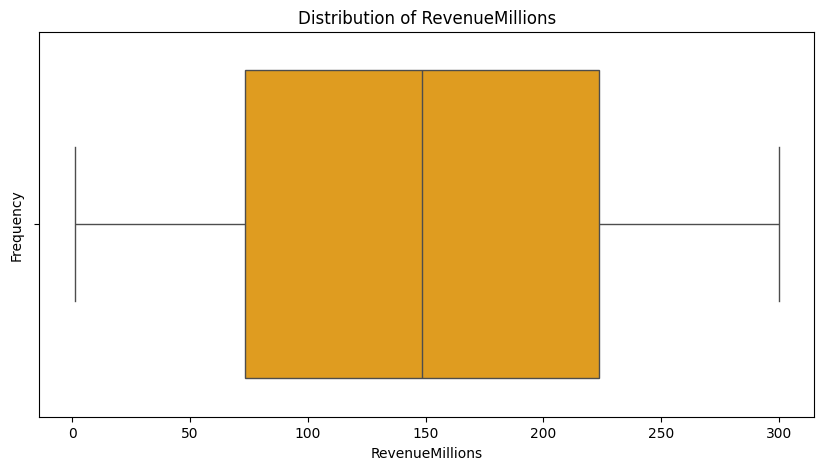

In [9]:
# Box plots for numerical variables
for column in numericel_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=numericel_columns[column], color='orange')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

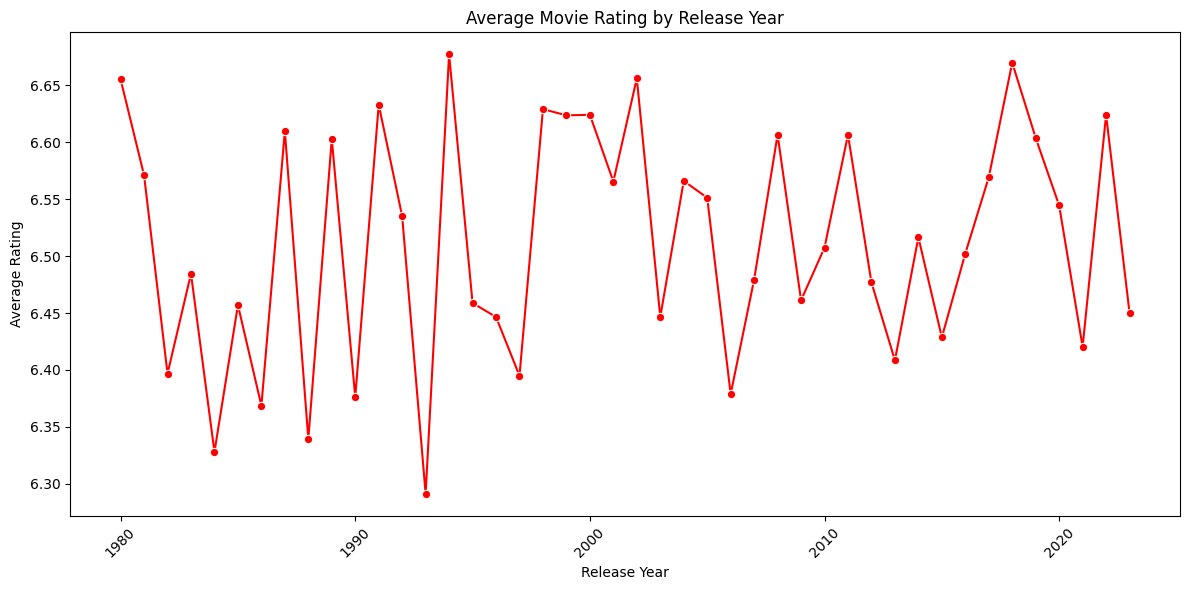

In [10]:
# Calculate average rating per release year
plt.figure(figsize=(12, 6))
avg_rating_per_year = df.groupby('ReleaseYear')['Rating'].mean().reset_index()
sns.lineplot(data=avg_rating_per_year, x='ReleaseYear', y='Rating', marker='o',color ='red')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()

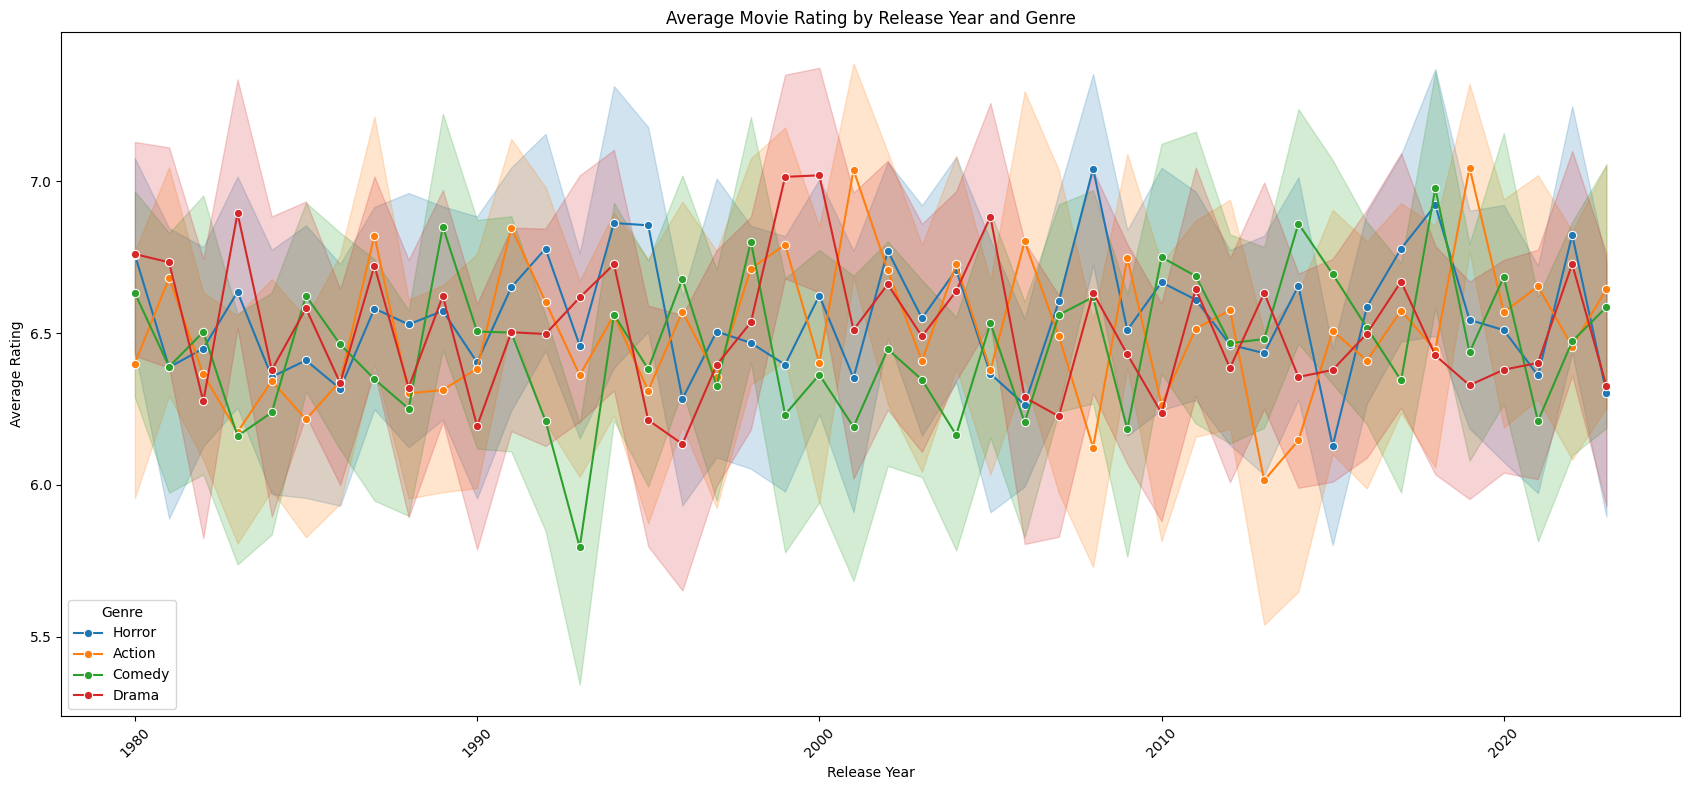

In [11]:
plt.figure(figsize=(17, 8))
sns.lineplot(data=df, x='ReleaseYear', y='Rating', hue='Genre', marker='o')
plt.title('Average Movie Rating by Release Year and Genre')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

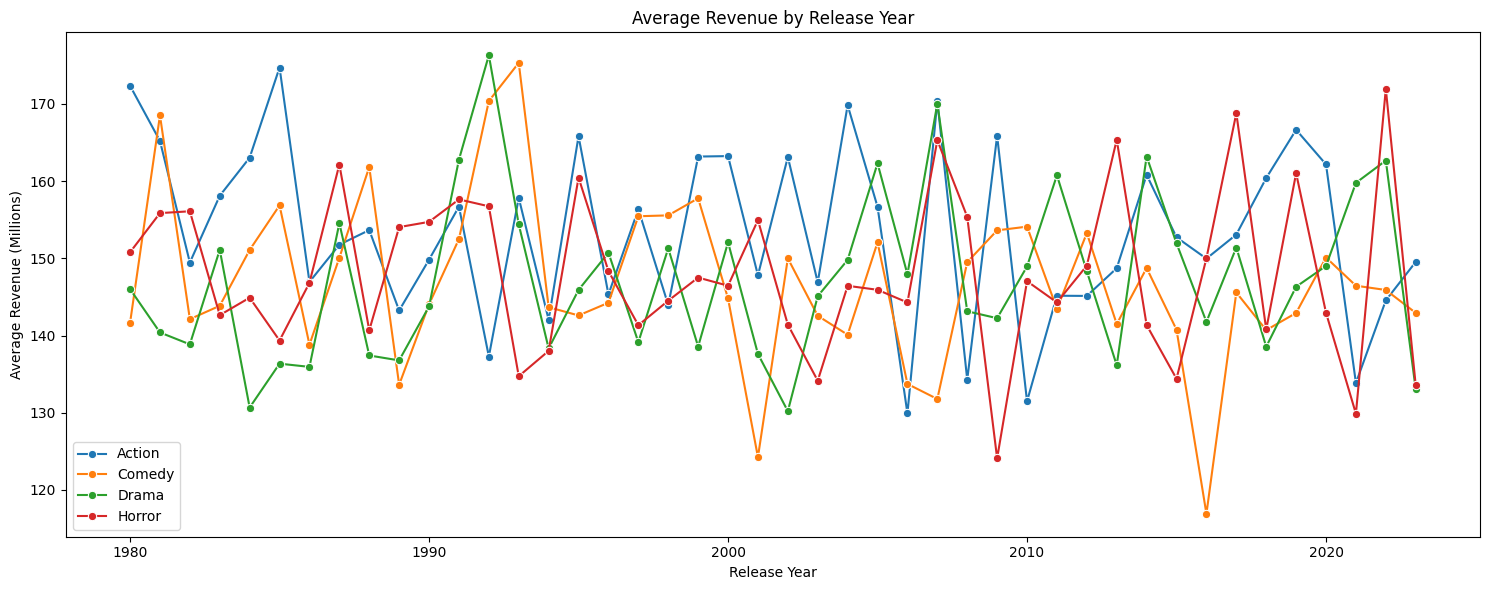

In [12]:
# Group by ReleaseYear and Genre, then calculate the average RevenueMillions for each group
m_avg = df.groupby(["ReleaseYear", "Genre"])["RevenueMillions"].mean().reset_index()

plt.figure(figsize=(15, 6))
# Plot the average revenue by release year and genre using a line plot
sns.lineplot(data=m_avg, x='ReleaseYear', y='RevenueMillions', marker='o', color='green', hue='Genre')
plt.title('Average Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue (Millions)')
plt.legend()
plt.tight_layout()
plt.show()

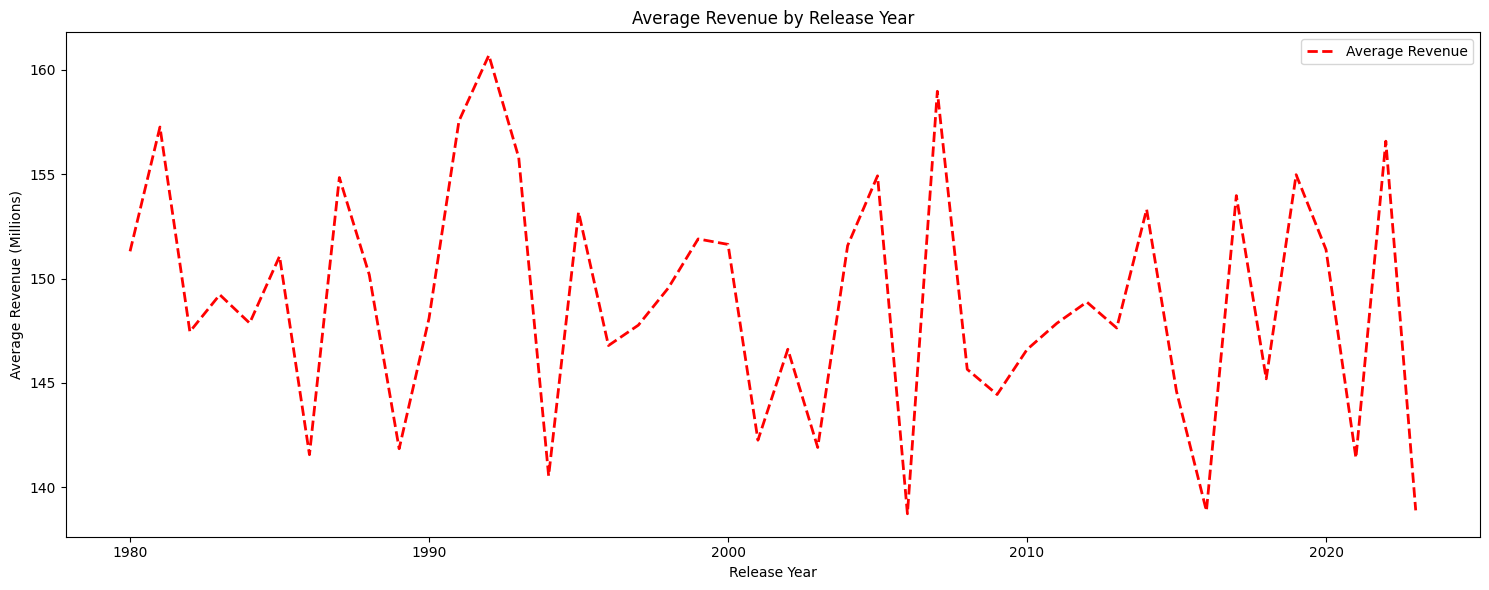

In [13]:
# Group by ReleaseYear and calculate the average revenue for each year
m_avg = df.groupby("ReleaseYear")["RevenueMillions"].mean().reset_index()

# Plot the average revenue by release year
plt.figure(figsize=(15, 6))
plt.plot(
    m_avg['ReleaseYear'],
    m_avg['RevenueMillions'],
    color='red',
    label='Average Revenue',
    linewidth=2,
    linestyle='--'
)
plt.title('Average Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue (Millions)')
plt.legend()
plt.tight_layout()
plt.show()

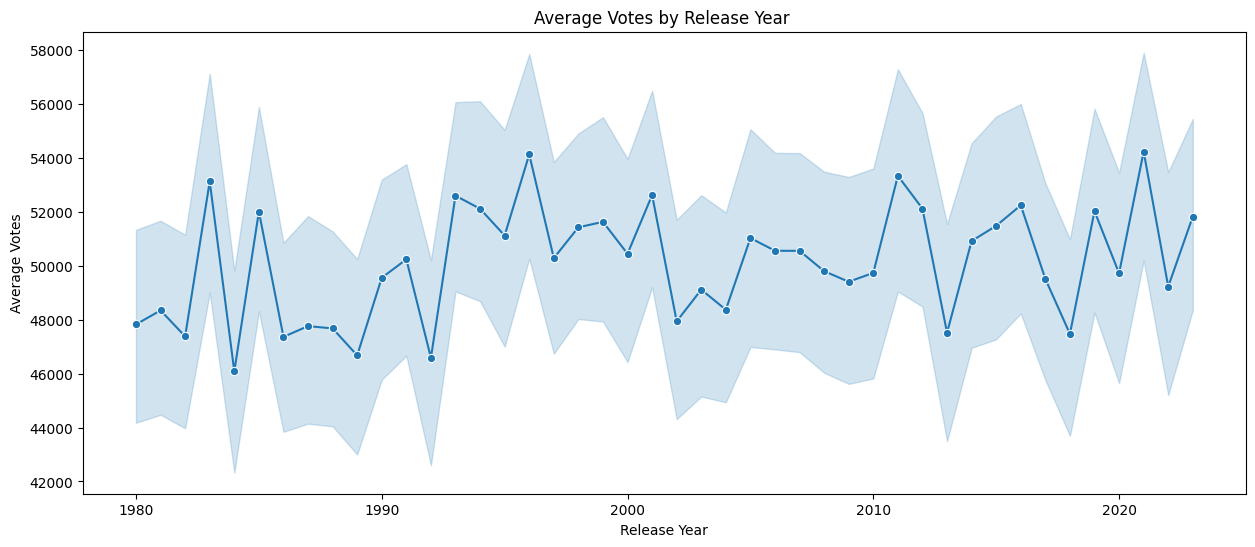

In [14]:
# Average Votes by Release Year
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='ReleaseYear', y='Votes', marker='o')
plt.title('Average Votes by Release Year ')
plt.xlabel('Release Year')
plt.ylabel('Average Votes')
plt.show()

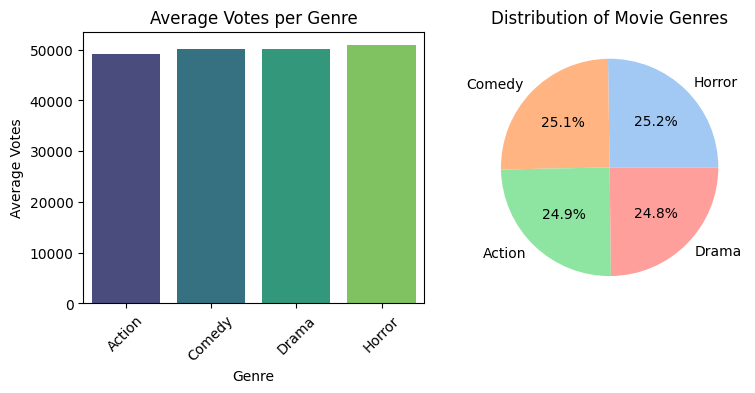

In [15]:
# Calculate the average number of votes per genre
votes_per_genre = df.groupby('Genre')['Votes'].mean().reset_index()

plt.figure(figsize=(8, 2))

# Bar plot: Average votes per genre
plt.subplot(1, 2, 1)
sns.barplot(data=votes_per_genre, x='Genre', y='Votes', palette='viridis')
plt.title('Average Votes per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.tight_layout()

# Pie chart: Distribution of movie genres
plt.subplot(1, 2, 2)
df["Genre"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),
    colors=sns.color_palette('pastel')
)
plt.title('Distribution of Movie Genres')
plt.ylabel('')
plt.show()


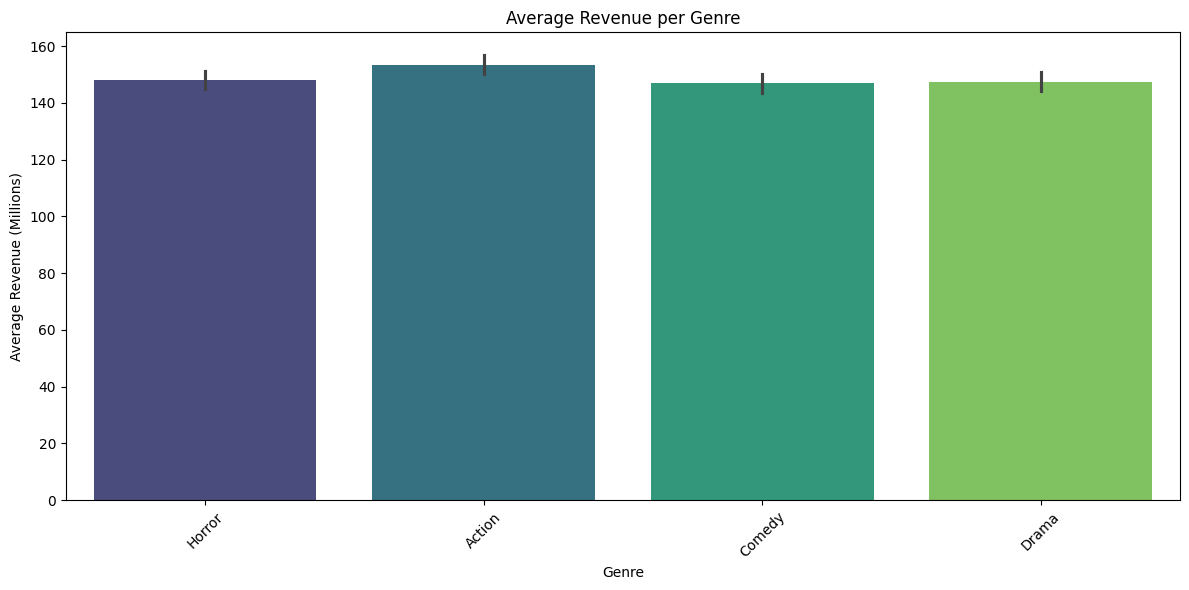

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Genre', y='RevenueMillions', palette='viridis')
plt.title('Average Revenue per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

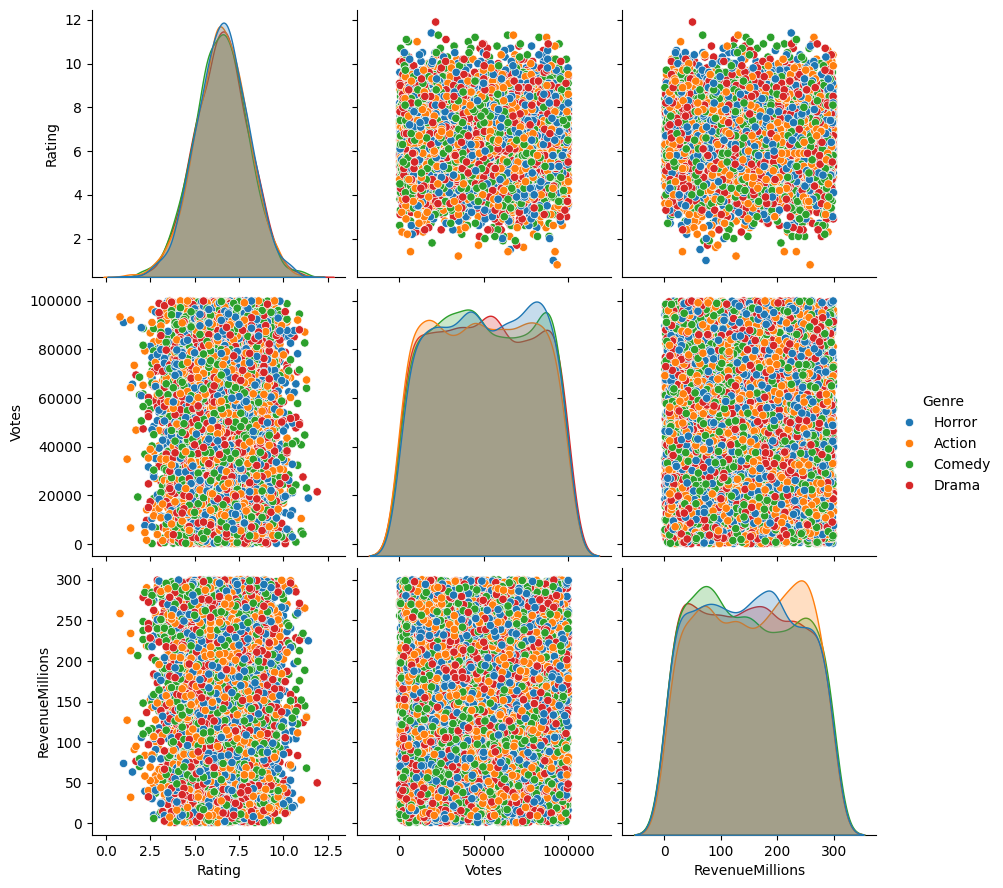

In [17]:
sns.pairplot(df, hue='Genre', vars=['Rating', 'Votes', 'RevenueMillions'], height=3)
plt.show()

# Remove the outliers

<Axes: xlabel='Rating'>

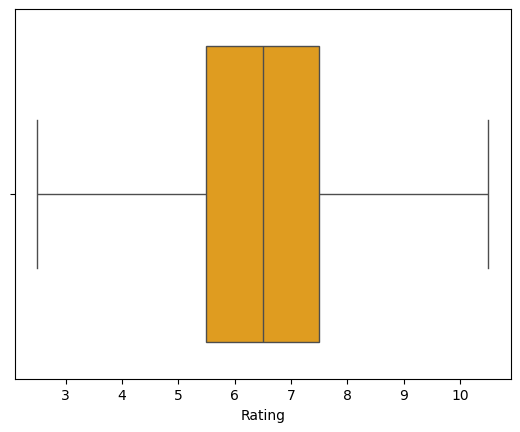

In [18]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df,"Rating")
sns.boxplot(x=df["Rating"], color='orange') 

# Feature Engineering

In [19]:
# Drop the 'MovieID' column as it's not needed for analysis
df.drop(columns=["MovieID"], inplace=True)

# Create a new feature 'MovieScore' based on Rating, Votes, and RevenueMillions
df['MovieScore'] = (df['Rating'] * np.log1p(df['Votes'])) + (df['RevenueMillions'] / 10)

In [20]:
x = df.drop(columns = [ "RevenueMillions"])
y = df["RevenueMillions"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Define preprocessing for numeric and categorical columns
numeric_features = ['ReleaseYear', 'Rating', 'Votes', 'MovieScore']
categorical_features = ['Genre', 'Title']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline that first preprocesses, then fits the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth = 20,min_samples_leaf = 2,min_samples_split = 2,random_state=42))
])



# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)
# Predict on the test set
y_pred = pipeline.predict(x_test)
# Calculate RMSE
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {mse}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test RMSE: 20.02968368393561
Test R2: 0.9456996563424501


# Exporting the Model 

In [18]:
import pickle

# Save the trained pipeline (model) to a file
pickle.dump(pipeline, open("movie_model.pkl", "wb"))

# Save the cleaned and feature-engineered dataframe to a file
pickle.dump(df, open("movie_data.pkl", "wb"))

# Export the dataframe to a CSV file for further use or sharing
df.to_csv('imdb_mock_data.csv', index=False)